# Image processing
We'll not directly going to construct our model, instead let's formalize our self with the data first by making some fun Image processing techniques. About the dataset, we 'll use the famous LFW Dataset.
We can use directly the dataset into the model, there's no need to clean it since it 's already done, this notebook covers some of the techniques you can use if the dataset is not clean or to simplfiy the  input data fed to the model, for our case we'll use an already trained net.

## About the dataset
The Labeled Faces in the Wild (LFW) dataset is a comprehensive collection of face photographs tailored for studying unconstrained face recognition. It encompasses a diverse range of images captured under varied conditions, including lighting, expressions, and backgrounds. Noteworthy for its meticulous labeling, the dataset provides ground truth information on depicted individuals. Its images are renowned for their high quality and cleanliness, having undergone thorough preprocessing. This cleanliness minimizes potential confounding factors, enhancing reliability in experimental results.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from fastai.vision.all import *
from PIL import ImageFile
from skimage.filters import threshold_niblack

Let's explore our data!

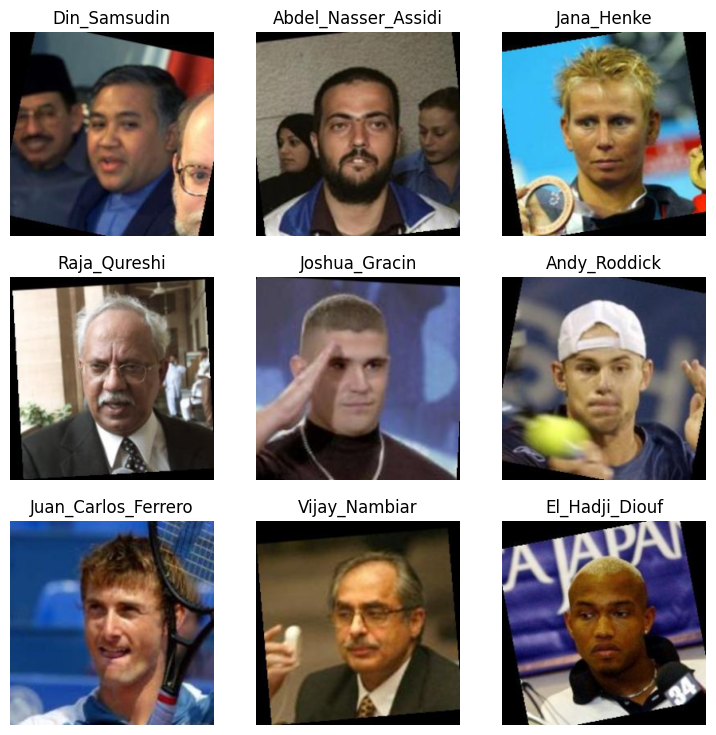

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
path = Path('../input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/')
data = ImageDataLoaders.from_folder(path, train='train',
                                   item_tfms=Resize(256),valid_pct=0.2,
                                   bs=64,seed=0)
data.show_batch()

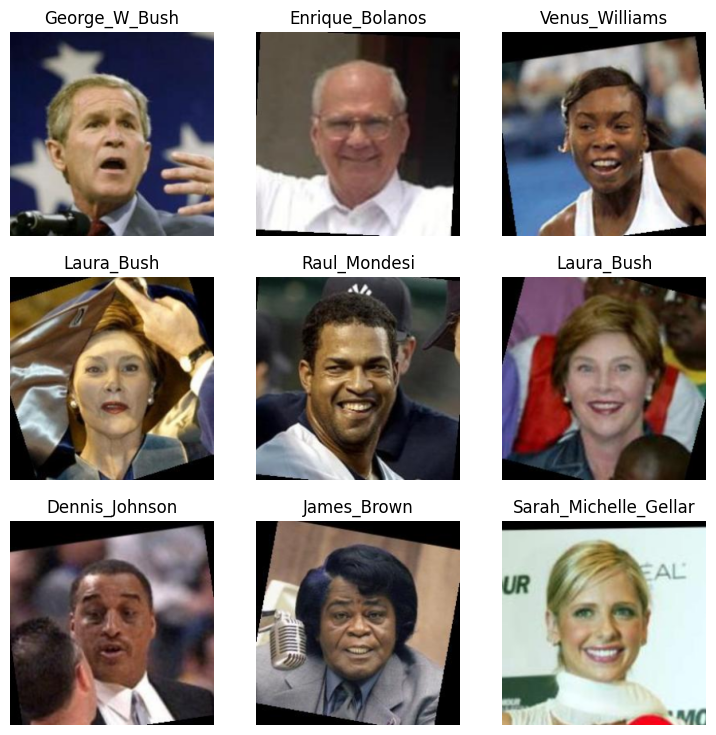

In [5]:
data.show_batch()

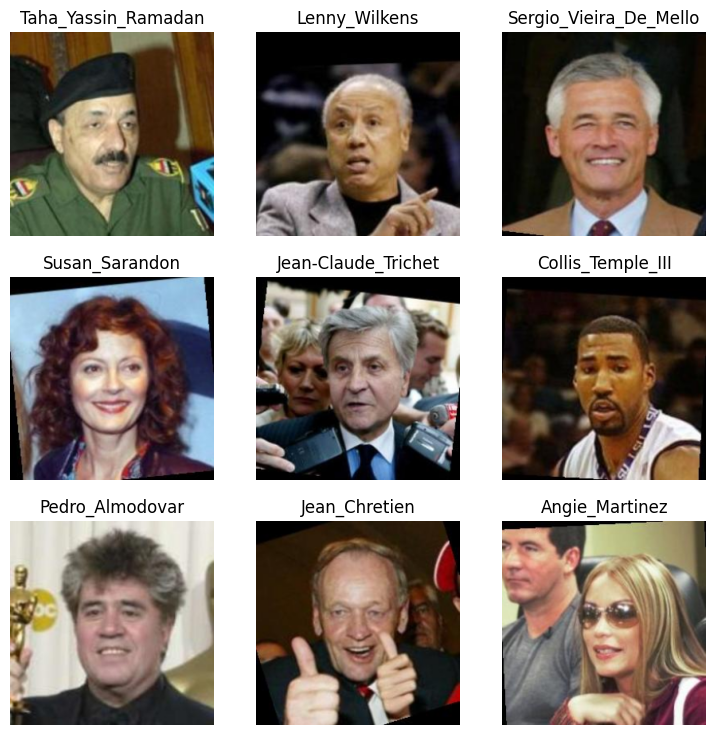

In [6]:
data.show_batch()

You see! This initial exploration of the dataset shows how it is clean, in the following steps we'll employ some of the known image processing techniques.
For that let's take an example of an image to test these techniques.

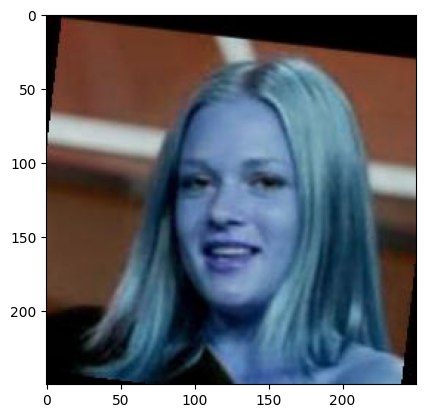

In [14]:
img_path = '../input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

One way you could use to simplify the input data before you can feed it into your model is to convert image into grayscale

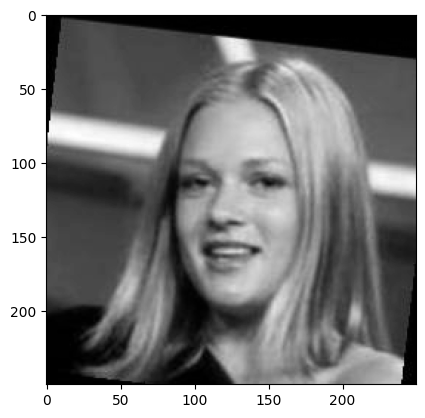

In [22]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

You could also try Binarization which could be done by either Global or Adaptive thresholding.
Adaptive thresholding generally works better since takes in consideration the region in which it's setting a threshold. 
In Niblack's algorithm for example, the threshold for each pixel is calculated using the following formula:

$T(x,y) = m(x,y) + k⋅s(x,y)$

Where:
$T(x,y)$ is the threshold value for pixel $(x,y)$.

$m(x,y)$ is the mean intensity of the pixel values in the local neighborhood centered around pixel $(x,y)$. 

$s(x,y)$ is the standard deviation of the pixel values in the local neighborhood centered around pixel $(x,y)$.

$k$ is a constant factor that can be adjusted to control the threshold value.

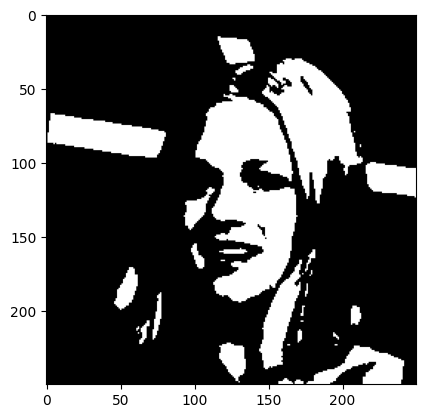

In [25]:
# Global thresholding
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap='gray')

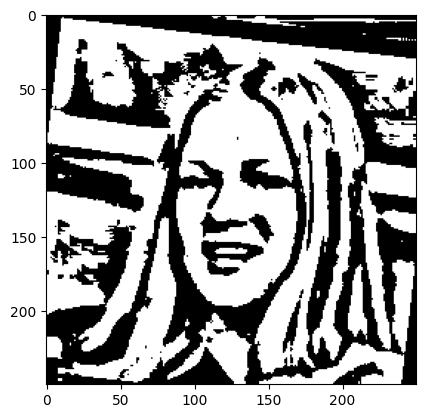

In [32]:
# Adaptive thresholding
window_size = 25
thresh_niblack = threshold_niblack(gray_img, window_size=window_size, k=0.2)
binary_niblack = gray_img > thresh_niblack
plt.imshow(binary_niblack, cmap=plt.cm.gray)

For now we'll use the Sobel algorithm as an Egde detection technique.
In the edge detection kernels are what underneathe the hood is used, kernels have their own significant role to perform their task after convolving. For the Sobel case and since it's a gradient based edge detector after convolving the image with the Sobel kernels, the gradient magnitude at each pixel is computed using the formula: 

$G = \sqrt{G_x^2 + G_y^2}$

For better edge detection Noise reduction is applied:

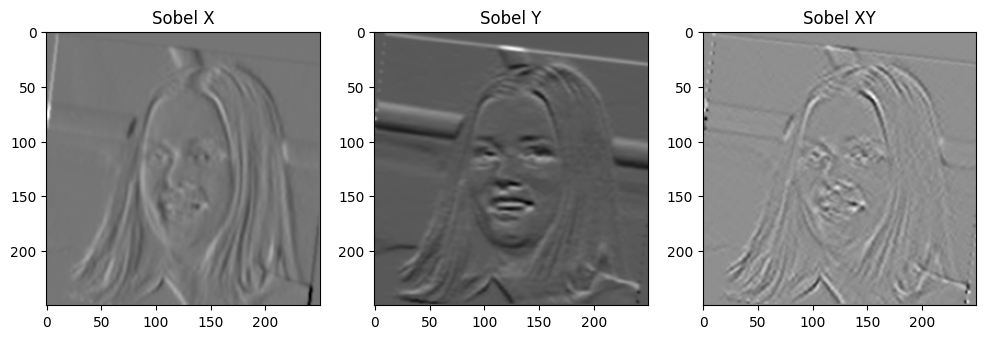

In [40]:
img_blur = cv2.GaussianBlur(gray_img, (3,3), 0) 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.subplot(1, 3, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.subplot(1, 3, 3)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel XY')
plt.show()